In [1]:
import cv2

In [5]:
img=cv2.imread('mrunal1.png')
img=cv2.resize(img, (500, 500))
print(img.shape)

new_img = cv2.Canny(img, 200, 200, apertureSize=5, L2gradient=True)
print(new_img.shape)

cv2.imshow('Original', img)
cv2.imshow('Canny Edge Detection', new_img)


cv2.waitKey(0)
cv2.destroyAllWindows()


(500, 500, 3)
(500, 500)


In [13]:
import numpy as np
img=cv2.imread('mrunal1.png')
# Convert existing image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # Detect horizontal edges
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # Detect vertical edges

# Combine the two gradients (horizontal and vertical)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Convert back to uint8 and normalize to 0-255 range
sobel_edges = cv2.convertScaleAbs(sobel_edges)

# Display the result
cv2.imshow('Original', img)
cv2.imshow('Sobel Edge Detection', sobel_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()




1. **`import numpy as np`**  
   - **Description**: Imports NumPy for array operations. OpenCV images are NumPy arrays.  
   - **Math**: No direct math here; it’s a setup step.

2. **`gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`**  
   - **Description**: Converts a BGR color image to grayscale.  
   - **Math**: For a pixel with BGR values $(B, G, R)$, the grayscale intensity $I$ is computed as a weighted sum:  
     $$
     I = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
     $$
     This reduces the 3-channel image (height × width × 3) to a single-channel image (height × width).

3. **`sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)`**  
   - **Description**: Computes the horizontal gradient (edges along the x-axis).  
   - **Math**: Uses a 3x3 Sobel kernel for the x-direction:  
     $$
     K_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}
     $$
     The gradient $G_x$ at each pixel is the convolution of the image $I$ with $K_x$:  
     $$
     G_x = I * K_x
     $$
     This highlights vertical edges (intensity changes horizontally). Output is in 64-bit float (`cv2.CV_64F`) to preserve negative values.

4. **`sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)`**  
   - **Description**: Computes the vertical gradient (edges along the y-axis).  
   - **Math**: Uses a 3x3 Sobel kernel for the y-direction:  
     $$
     K_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
     $$
     The gradient $G_y$ is:  
     $$
     G_y = I * K_y
     $$
     This highlights horizontal edges (intensity changes vertically).

5. **`sobel_edges = cv2.magnitude(sobel_x, sobel_y)`**  
   - **Description**: Combines horizontal and vertical gradients into a single edge magnitude.  
   - **Math**: The edge magnitude $M$ at each pixel is the Euclidean norm of the gradient vector $(G_x, G_y)$:  
     $$
     M = \sqrt{G_x^2 + G_y^2}
     $$
     This gives the strength of edges regardless of direction, still in float format.

6. **`sobel_edges = cv2.convertScaleAbs(sobel_edges)`**  
   - **Description**: Converts the magnitude to an 8-bit image (0-255 range).  
   - **Math**: Takes the absolute value and scales it:  
     $$
     M_{\text{uint8}} = \min\left(255, \alpha \cdot |M| + \beta\right)
     $$
     Where $\alpha$ and $\beta$ are scaling factors (default $\alpha = 1$, $\beta = 0$), and the result is clipped to 0-255. This makes it displayable.

7. **`cv2.imshow('Original', img)`**  
   - **Description**: Displays the original BGR image.  
   - **Math**: No computation; just renders the pixel values of `img`.

8. **`cv2.imshow('Sobel Edge Detection', sobel_edges)`**  
   - **Description**: Displays the edge-detected image.  
   - **Math**: No further computation; shows $M_{\text{uint8}}$.

9. **`cv2.waitKey(0)`**  
   - **Description**: Pauses execution until a key is pressed.  
   - **Math**: No math; it’s a control step.

10. **`cv2.destroyAllWindows()`**  
    - **Description**: Closes all display windows.  
    - **Math**: No math; cleanup step.



### Mathematical Summary
- The Sobel operator approximates the image gradient $\nabla I = (G_x, G_y)$ using convolution with kernels $K_x$ and $K_y$.  
- The gradient magnitude $M = \sqrt{G_x^2 + G_y^2}$ represents edge strength.  
- The final output normalizes this to a visible range (0-255).

This process mathematically detects areas of rapid intensity change (edges) in the image, making them stand out in the result. Let me know if you’d like a deeper dive into any step!

In [12]:
import cv2

# Load image (assumed)
img = cv2.imread('ram.png')

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise (common in production)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply Laplacian
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)
laplacian_edges = cv2.convertScaleAbs(laplacian)

# Display
cv2.imshow('Laplacian Edges', laplacian_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Image Scaling, Rotating using OpenCV**  

In [ ]:
import cv2
org_img = cv2.imread('jaspreet.png')
# res_img =  cv2.resize(org_img, (500, 500))
cv2.imshow(' mage', org_img)
# cv2.imshow('Sai image', res_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

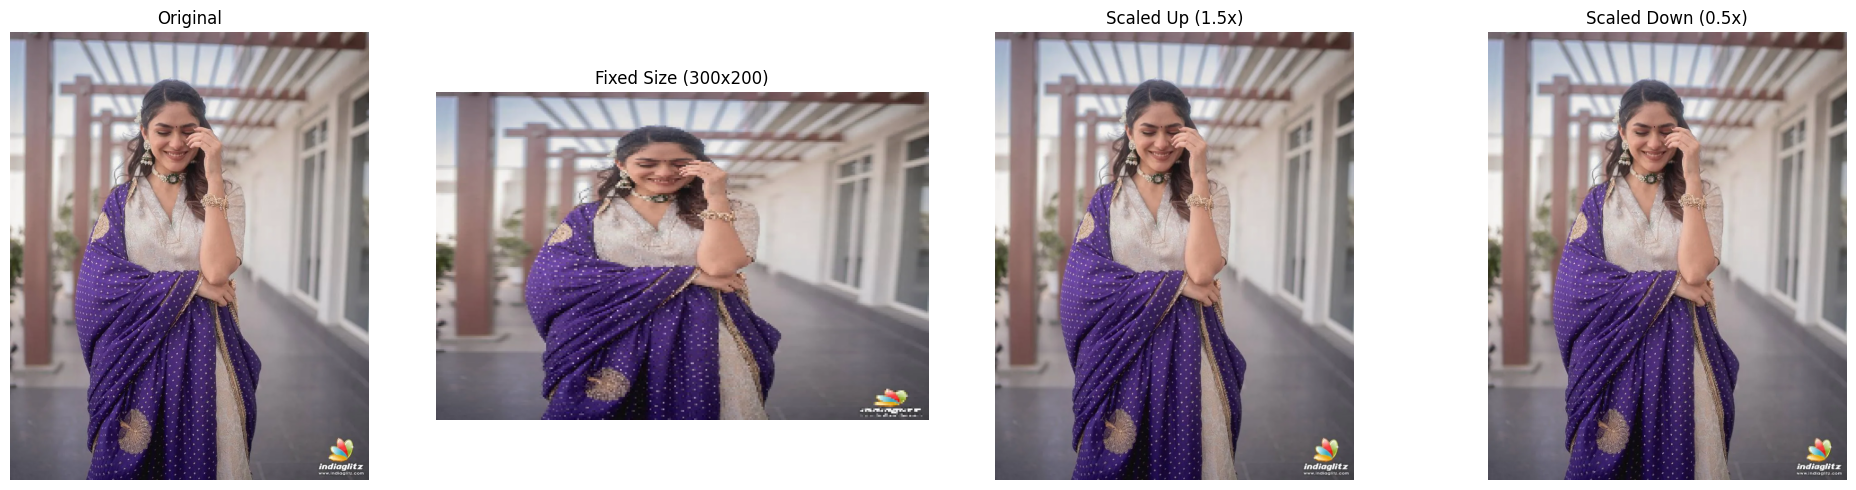

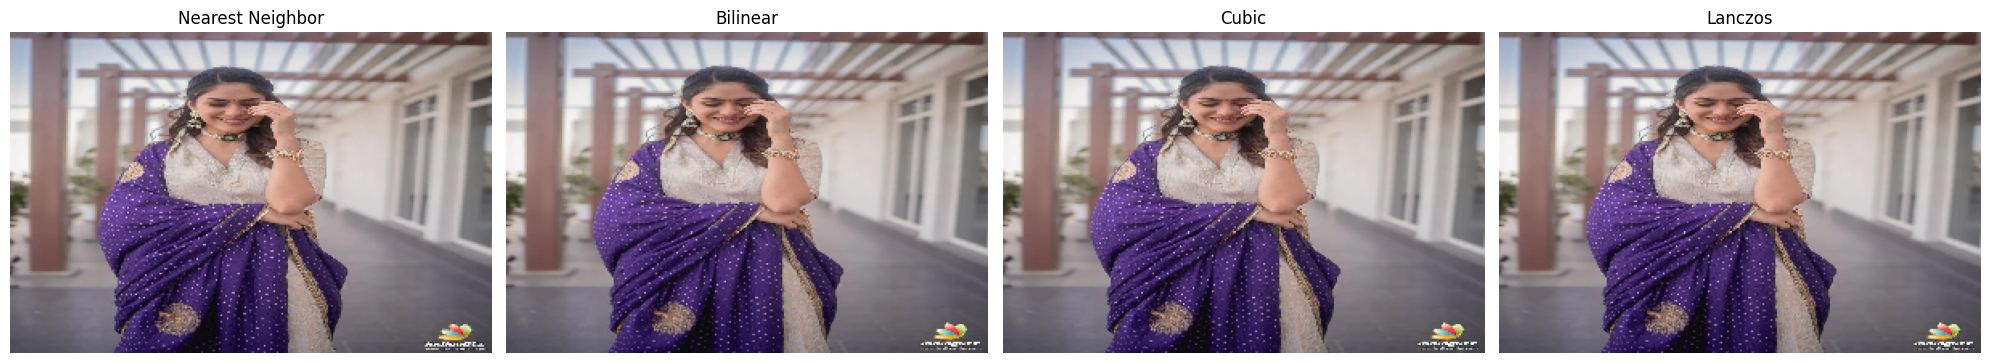

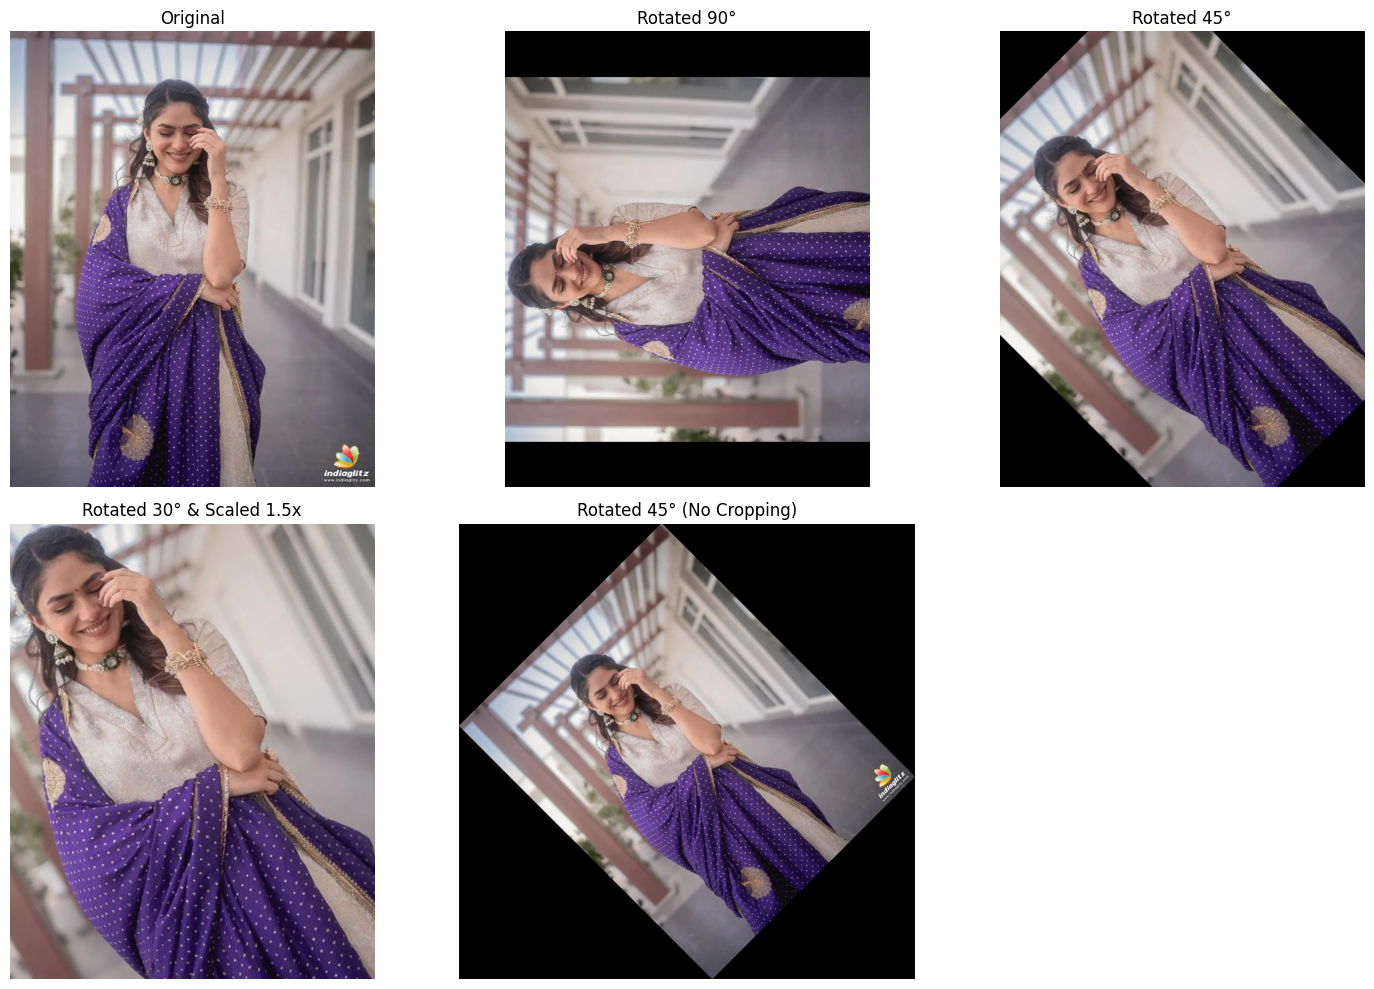

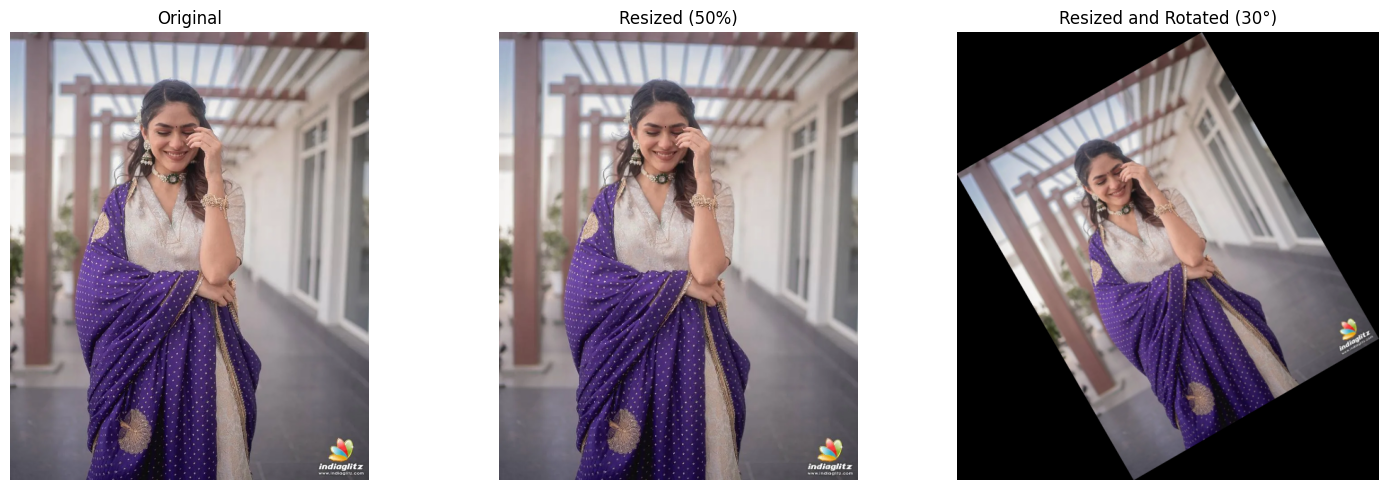

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles, rows=1, cols=None):
    if cols is None:
        cols = len(images) // rows + (1 if len(images) % rows else 0)
    
    plt.figure(figsize=(cols * 5, rows * 5))
    
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        
        # Convert BGR to RGB for displaying with matplotlib
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load an image
image_path = "mrunal.png"  # Replace with your image path
img = cv2.imread(image_path)

if img is None:
    raise ValueError(f"Could not read image: {image_path}")

# Make a copy of the original image
original = img.copy()

# ------------------------
# IMAGE SCALING
# ------------------------

# 1. Scaling with fixed dimensions
fixed_scale = cv2.resize(img, (300, 200))  # Width=300, Height=200

# 2. Scaling with scaling factors
scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5)  # Scale up by 50%
scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5)  # Scale down by 50%

# 3. Scaling with different interpolation methods
bilinear = cv2.resize(img, (300, 200), interpolation=cv2.INTER_LINEAR)
nearest = cv2.resize(img, (300, 200), interpolation=cv2.INTER_NEAREST)
cubic = cv2.resize(img, (300, 200), interpolation=cv2.INTER_CUBIC)
lanczos = cv2.resize(img, (300, 200), interpolation=cv2.INTER_LANCZOS4)

# Display scaling results
scaling_images = [original, fixed_scale, scaled_up, scaled_down]
scaling_titles = ["Original", "Fixed Size (300x200)", "Scaled Up (1.5x)", "Scaled Down (0.5x)"]
display_images(scaling_images, scaling_titles)

# Display interpolation results
interp_images = [nearest, bilinear, cubic, lanczos]
interp_titles = ["Nearest Neighbor", "Bilinear", "Cubic", "Lanczos"]
display_images(interp_images, interp_titles)

# ------------------------
# IMAGE ROTATION
# ------------------------

# Get image dimensions
height, width = img.shape[:2]
center = (width // 2, height // 2)

# 1. Simple rotation (might crop image parts)
rotation_matrix_90 = cv2.getRotationMatrix2D(center, 90, 1.0)  # 90 degrees
rotated_90 = cv2.warpAffine(img, rotation_matrix_90, (width, height))

rotation_matrix_45 = cv2.getRotationMatrix2D(center, 45, 1.0)  # 45 degrees
rotated_45 = cv2.warpAffine(img, rotation_matrix_45, (width, height))

# 2. Rotation with scale
rotation_matrix_scaled = cv2.getRotationMatrix2D(center, 30, 1.5)  # 30 degrees, 1.5x scale
rotated_scaled = cv2.warpAffine(img, rotation_matrix_scaled, (width, height))

# 3. Rotation without cropping
# Calculate new bounding dimensions for the rotated image
angle = 45  # in degrees
radians = np.radians(angle)
sin = np.abs(np.sin(radians))
cos = np.abs(np.cos(radians))
new_width = int((height * sin) + (width * cos))
new_height = int((height * cos) + (width * sin))

# Adjust the rotation matrix to take into account the new dimensions
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# Apply the rotation
rotated_full = cv2.warpAffine(img, rotation_matrix, (new_width, new_height))

# Display rotation results
rotation_images = [original, rotated_90, rotated_45, rotated_scaled, rotated_full]
rotation_titles = ["Original", "Rotated 90°", "Rotated 45°", "Rotated 30° & Scaled 1.5x", "Rotated 45° (No Cropping)"]
display_images(rotation_images, rotation_titles, rows=2, cols=3)

# ------------------------
# PRACTICAL APPLICATION: COMBINED OPERATIONS
# ------------------------

# Resize to 50% and rotate 30 degrees
img_small = cv2.resize(img, None, fx=0.5, fy=0.5)
height_small, width_small = img_small.shape[:2]
center_small = (width_small // 2, height_small // 2)

# Calculate bounding box for the rotated image
angle = 30
radians = np.radians(angle)
sin = np.abs(np.sin(radians))
cos = np.abs(np.cos(radians))
new_width = int((height_small * sin) + (width_small * cos))
new_height = int((height_small * cos) + (width_small * sin))

# Adjust the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center_small, angle, 1.0)
rotation_matrix[0, 2] += (new_width / 2) - center_small[0]
rotation_matrix[1, 2] += (new_height / 2) - center_small[1]

# Apply the rotation
final_image = cv2.warpAffine(img_small, rotation_matrix, (new_width, new_height))

# Display the final result
combined_images = [original, img_small, final_image]
combined_titles = ["Original", "Resized (50%)", "Resized and Rotated (30°)"]
display_images(combined_images, combined_titles)

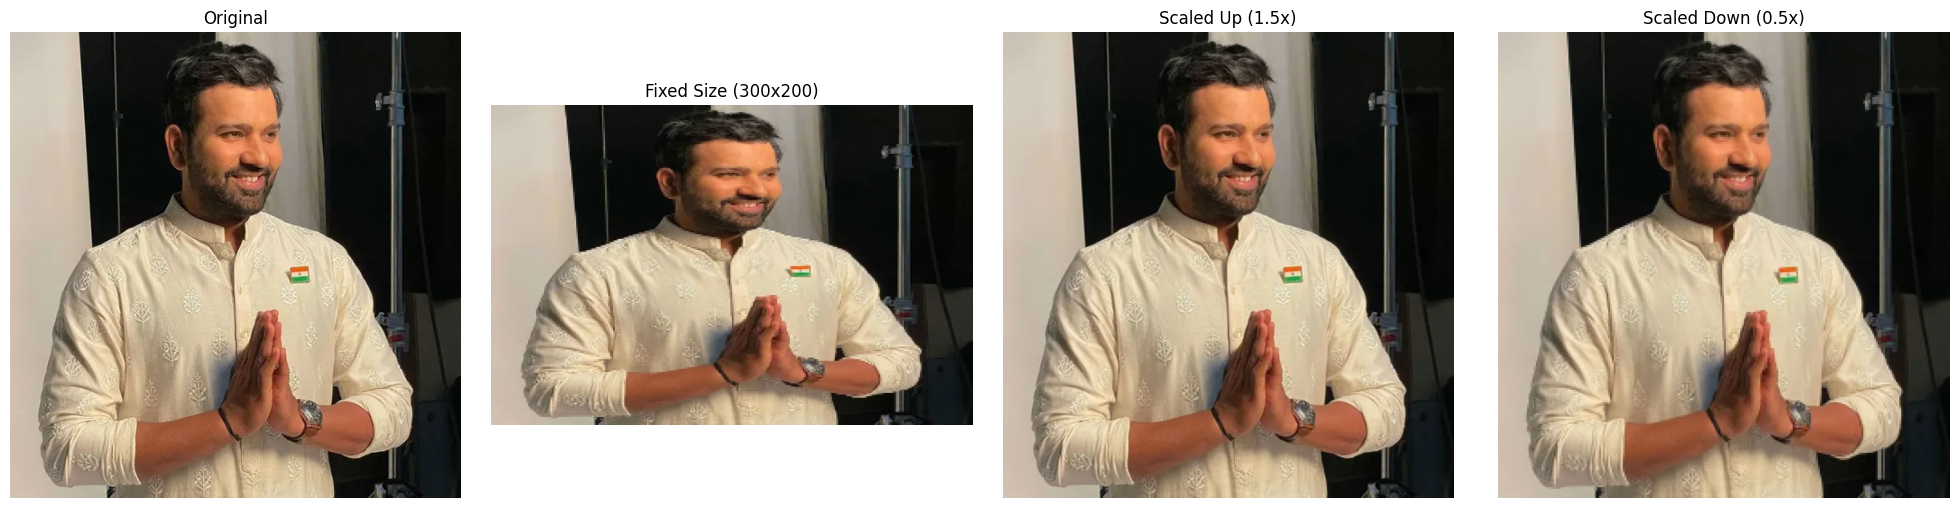

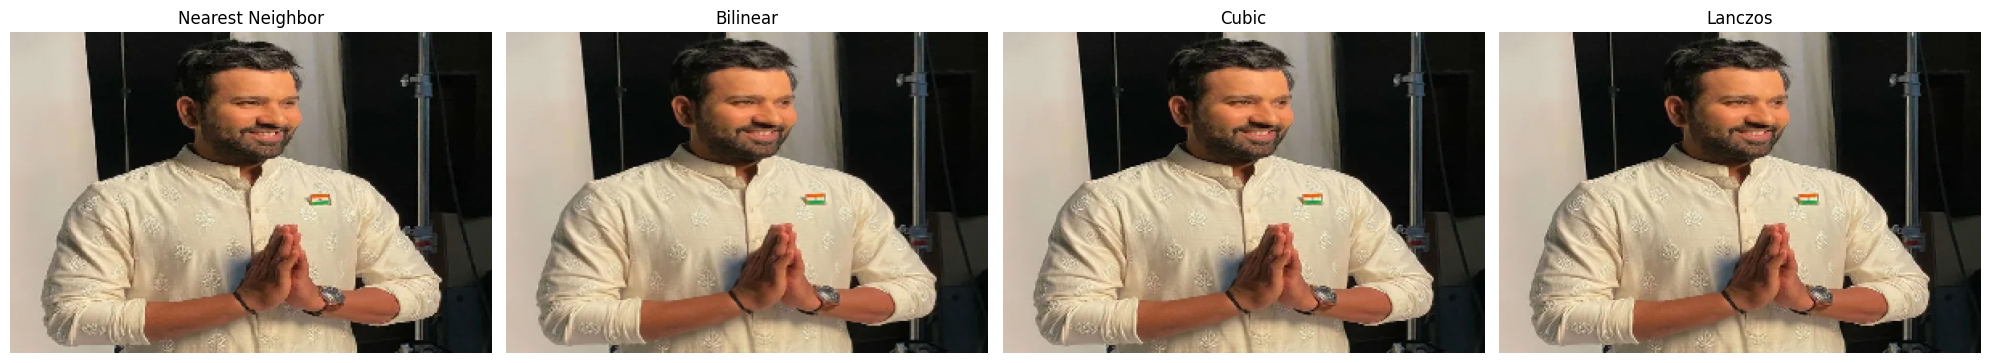

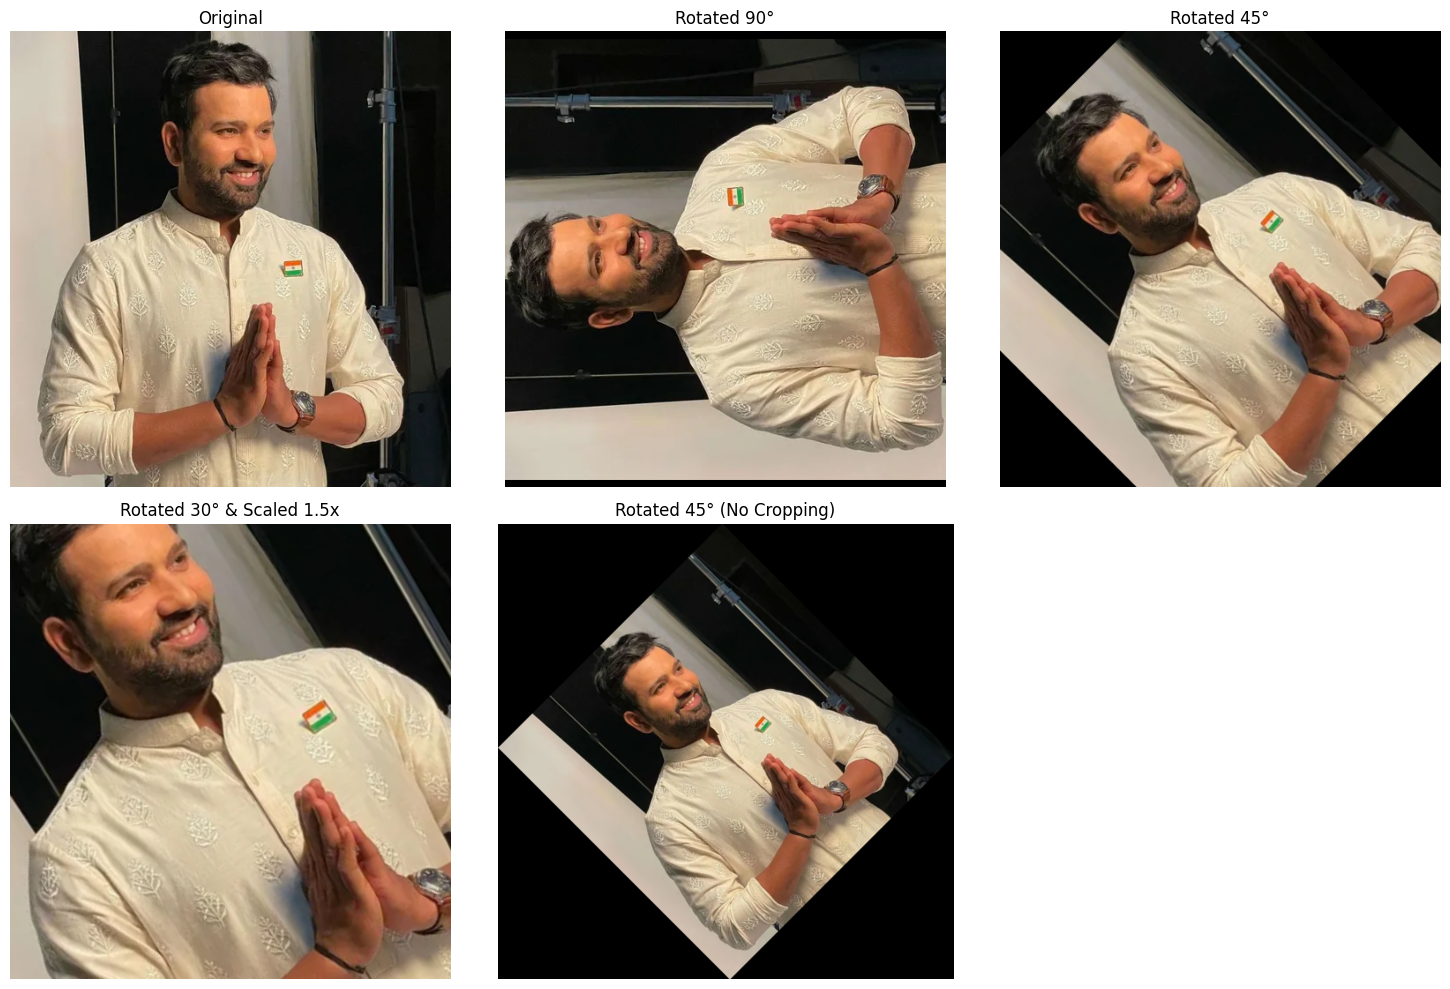

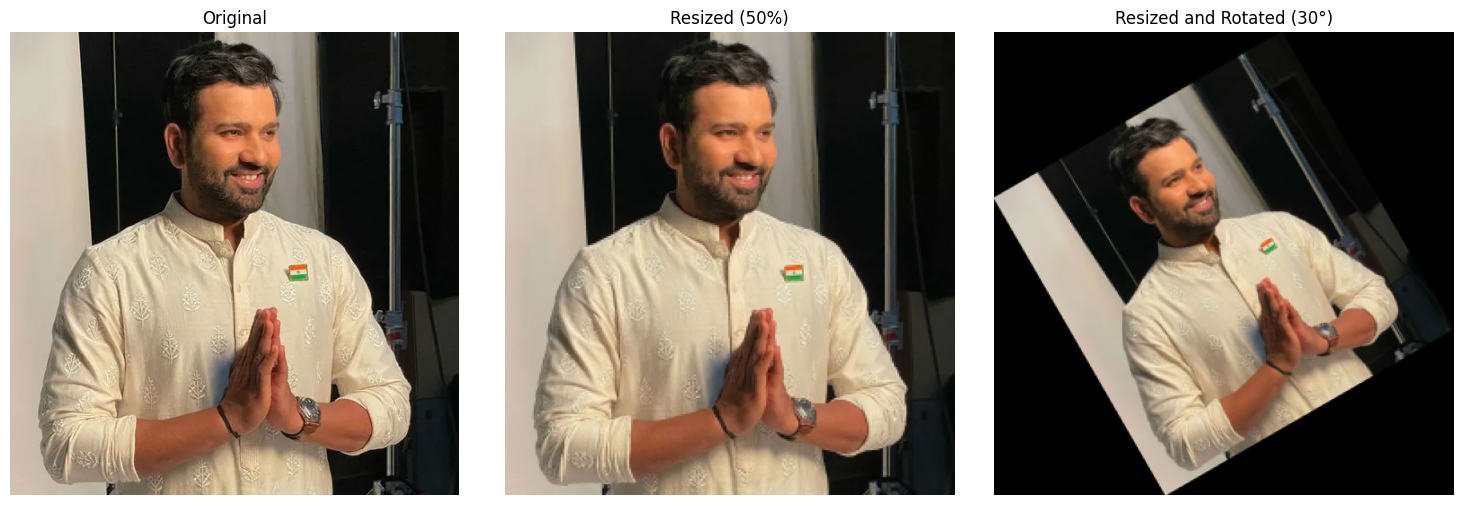

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_images(images, titles, rows=1, cols=None):
    """
    Display multiple images in a grid using matplotlib
    
    Args:
        images: List of images to display
        titles: List of titles for each image
        rows: Number of rows in the grid
        cols: Number of columns in the grid (calculated automatically if None)
    """
    if cols is None:
        cols = len(images) // rows + (1 if len(images) % rows else 0)
    
    plt.figure(figsize=(cols * 5, rows * 5))
    
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        
        # Convert BGR to RGB for displaying with matplotlib
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load an image
# image_path = "mrunal1.png"  # Replace with your image path
image_path = "rohit.png"  # Replace with your image path
img = cv2.imread(image_path)

if img is None:
    raise ValueError(f"Could not read image: {image_path}")

# Make a copy of the original image
original = img.copy()

# ------------------------
# IMAGE SCALING
# ------------------------

# 1. Scaling with fixed dimensions
fixed_scale = cv2.resize(img, (300, 200))  # Width=300, Height=200

# 2. Scaling with scaling factors
scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5)  # Scale up by 50%
scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5)  # Scale down by 50%

# 3. Scaling with different interpolation methods
bilinear = cv2.resize(img, (300, 200), interpolation=cv2.INTER_LINEAR)
nearest = cv2.resize(img, (300, 200), interpolation=cv2.INTER_NEAREST)
cubic = cv2.resize(img, (300, 200), interpolation=cv2.INTER_CUBIC)
lanczos = cv2.resize(img, (300, 200), interpolation=cv2.INTER_LANCZOS4)

# Display scaling results
scaling_images = [original, fixed_scale, scaled_up, scaled_down]
scaling_titles = ["Original", "Fixed Size (300x200)", "Scaled Up (1.5x)", "Scaled Down (0.5x)"]
display_images(scaling_images, scaling_titles)

# Display interpolation results
interp_images = [nearest, bilinear, cubic, lanczos]
interp_titles = ["Nearest Neighbor", "Bilinear", "Cubic", "Lanczos"]
display_images(interp_images, interp_titles)

# ------------------------
# IMAGE ROTATION
# ------------------------

# Get image dimensions
height, width = img.shape[:2]
center = (width // 2, height // 2)

# 1. Simple rotation (might crop image parts)
rotation_matrix_90 = cv2.getRotationMatrix2D(center, 90, 1.0)  # 90 degrees
rotated_90 = cv2.warpAffine(img, rotation_matrix_90, (width, height))

rotation_matrix_45 = cv2.getRotationMatrix2D(center, 45, 1.0)  # 45 degrees
rotated_45 = cv2.warpAffine(img, rotation_matrix_45, (width, height))

# 2. Rotation with scale
rotation_matrix_scaled = cv2.getRotationMatrix2D(center, 30, 1.5)  # 30 degrees, 1.5x scale
rotated_scaled = cv2.warpAffine(img, rotation_matrix_scaled, (width, height))

# 3. Rotation without cropping
# Calculate new bounding dimensions for the rotated image
angle = 45  # in degrees
radians = np.radians(angle)
sin = np.abs(np.sin(radians))
cos = np.abs(np.cos(radians))
new_width = int((height * sin) + (width * cos))
new_height = int((height * cos) + (width * sin))

# Adjust the rotation matrix to take into account the new dimensions
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# Apply the rotation
rotated_full = cv2.warpAffine(img, rotation_matrix, (new_width, new_height))

# Display rotation results
rotation_images = [original, rotated_90, rotated_45, rotated_scaled, rotated_full]
rotation_titles = ["Original", "Rotated 90°", "Rotated 45°", "Rotated 30° & Scaled 1.5x", "Rotated 45° (No Cropping)"]
display_images(rotation_images, rotation_titles, rows=2, cols=3)

# ------------------------
# PRACTICAL APPLICATION: COMBINED OPERATIONS
# ------------------------

# Resize to 50% and rotate 30 degrees
img_small = cv2.resize(img, None, fx=0.5, fy=0.5)
height_small, width_small = img_small.shape[:2]
center_small = (width_small // 2, height_small // 2)

# Calculate bounding box for the rotated image
angle = 30
radians = np.radians(angle)
sin = np.abs(np.sin(radians))
cos = np.abs(np.cos(radians))
new_width = int((height_small * sin) + (width_small * cos))
new_height = int((height_small * cos) + (width_small * sin))

# Adjust the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center_small, angle, 1.0)
rotation_matrix[0, 2] += (new_width / 2) - center_small[0]
rotation_matrix[1, 2] += (new_height / 2) - center_small[1]

# Apply the rotation
final_image = cv2.warpAffine(img_small, rotation_matrix, (new_width, new_height))

# Display the final result
combined_images = [original, img_small, final_image]
combined_titles = ["Original", "Resized (50%)", "Resized and Rotated (30°)"]
display_images(combined_images, combined_titles)